<h1 style=

<h1 style="text-align:center; color:purple">Anaysis on Hospitality Domain</h1>

Data set is taken from <a href = "https://codebasics.io/challenges/codebasics-resume-project-challenge/4">Code Basics</a>

In [1]:
import pandas as pd 

***
## 1. Data Exploration
***

**Datasets**
Here we have 5 csv files
1. dim_date.csv
2. dim_hotels.csv
3. dim_rooms.csv
4. fact_bookings.csv
5. fact_aggregated_bookings.csv

**Reading bookings data in a dataframe**

In [2]:
df_bookings= pd.read_csv("./datasets/fact_bookings.csv")
df_bookings.shape

(134590, 12)

**Exploring bookings data**

In [3]:
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300


In [4]:
df_bookings.room_category.unique()

<StringArray>
['RT1', 'RT2', 'RT3', 'RT4']
Length: 4, dtype: str

In [5]:
df_bookings.booking_platform.unique()

<StringArray>
[ 'direct online',         'others',        'logtrip',       'tripster',
   'makeyourtrip',        'journey', 'direct offline']
Length: 7, dtype: str

In [6]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

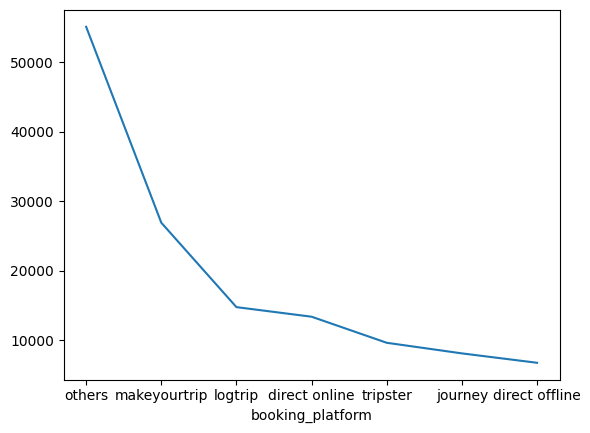

In [7]:
df_bookings.booking_platform.value_counts().plot()

<Axes: title={'center': 'Booking Platform Distribution'}, xlabel='Platform', ylabel='Number of Bookings'>

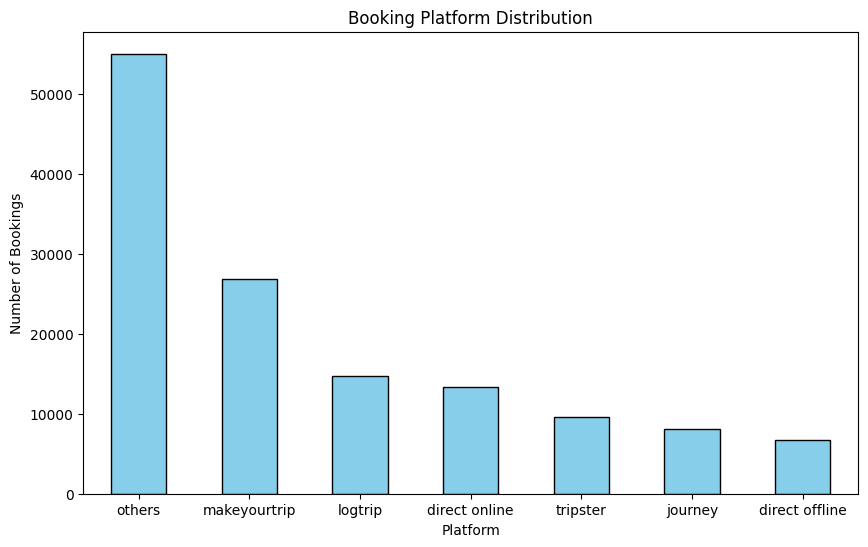

In [54]:
df_bookings.booking_platform.value_counts().plot(kind="bar",
    color="skyblue",         # Bar color
    figsize=(10, 6),         # Size of the figure
    title="Booking Platform Distribution",  # Title
    xlabel="Platform",       # X-axis label
    ylabel="Number of Bookings",  # Y-axis label
    #grid=True,               # Add grid lines
    edgecolor="black",       # Edge color of bars
    rot=0                  # Rotate x-axis labels for better readability
)

In [9]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


**Read Remaining Data Sets**

In [10]:
df_dates = pd.read_csv("./datasets/dim_date.csv")
df_hotels = pd.read_csv("./datasets/dim_hotels.csv")
df_rooms =  pd.read_csv("./datasets/dim_rooms.csv")
df_aggregated_bookings = pd.read_csv("./datasets/fact_aggregated_bookings.csv")

**Exploring dim_rooms.csv**

In [11]:
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


**Exploring df_hotels**

In [12]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [13]:
df_hotels.shape

(25, 4)

In [14]:
df_hotels.category.unique()

<StringArray>
['Luxury', 'Business']
Length: 2, dtype: str

In [15]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [16]:
df_hotels.city.unique()

<StringArray>
['Delhi', 'Mumbai', 'Hyderabad', 'Bangalore']
Length: 4, dtype: str

In [17]:
df_hotels.city.value_counts()

city
Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: count, dtype: int64

<Axes: title={'center': 'Booking Platform Distribution'}, xlabel='Platform', ylabel='Number of Bookings'>

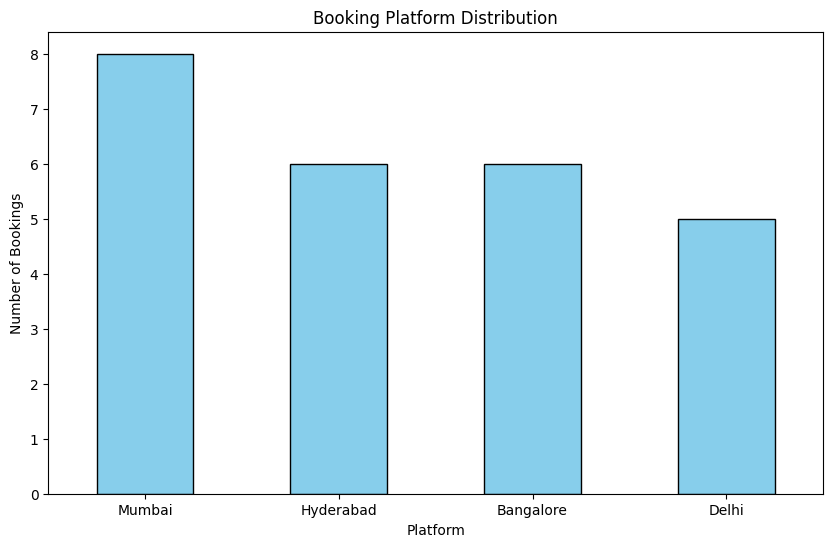

In [56]:
df_hotels.city.value_counts().plot(kind="bar",
    color="skyblue",         # Bar color
    figsize=(10, 6),         # Size of the figure
    title="Booking Platform Distribution",  # Title
    xlabel="Platform",       # X-axis label
    ylabel="Number of Bookings",  # Y-axis label
    #grid=True,               # Add grid lines
    edgecolor="black",       # Edge color of bars
    rot=0                  # Rotate x-axis labels for better readability
                                  )

**Exploring fact_aggregated_bookings.csv**

In [19]:
df_aggregated_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18
9196,16559,31-Jul-22,RT4,13,18
9197,17558,31-Jul-22,RT4,3,6
9198,19563,31-Jul-22,RT4,3,6


In [20]:
    df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300


In [21]:
df_aggregated_bookings[df_aggregated_bookings.successful_bookings > df_aggregated_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity


### Tasks

1. Find out unique property ids in aggregate bookings dataset

In [22]:
df_aggregated_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

2. ⁠Find out total bookings per property_id

In [23]:
df_aggregated_bookings.groupby("property_id")["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7147
17558    5036
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4728
19558    4371
19559    4705
19560    5979
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

3. ⁠Find out days on which bookings are greater than capacity

In [24]:
df_aggregated_bookings[df_aggregated_bookings.successful_bookings > df_aggregated_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity


4. ⁠Find out properties that have highest capacity

In [25]:
df_aggregated_bookings[df_aggregated_bookings.capacity == df_aggregated_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,01-May-22,RT2,38,50
128,17558,02-May-22,RT2,27,50
229,17558,03-May-22,RT2,26,50
328,17558,04-May-22,RT2,27,50
428,17558,05-May-22,RT2,29,50
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50
8828,17558,28-Jul-22,RT2,21,50
8928,17558,29-Jul-22,RT2,23,50
9028,17558,30-Jul-22,RT2,32,50


***
## 2. Data Cleaning
***

In [26]:
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300


**Check for negative or zero on df_bookings[no_guest]**

In [27]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


In [28]:
df_bookings.no_guests.min(),df_bookings.no_guests.max()

(np.int64(1), np.int64(6))

In [29]:
#  df_bookings = df_bookings[df_bookings.no_guests>0]

**Check for revenue column**

In [30]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(np.int64(6500), np.int64(45220))

In [31]:
df_bookings[df_bookings.revenue_generated == df_bookings.revenue_generated.max()]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
139,May012216559RT43,16559,2022-05-01,2022-05-01,2022-05-02,6,RT4,tripster,3.0,Checked Out,45220,45220
715,May012217560RT46,17560,2022-04-28,2022-05-01,2022-05-02,6,RT4,makeyourtrip,3.0,Checked Out,45220,45220
719,May012217560RT410,17560,2022-05-01,2022-05-01,2022-05-04,6,RT4,others,2.0,Checked Out,45220,45220
2107,May022216559RT47,16559,2022-04-28,2022-05-02,2022-05-04,6,RT4,logtrip,NaN,Checked Out,45220,45220
2381,May022217558RT42,17558,2022-04-25,2022-05-02,2022-05-08,6,RT4,makeyourtrip,3.0,Checked Out,45220,45220
...,...,...,...,...,...,...,...,...,...,...,...,...
132069,Jul302217563RT414,17563,2022-07-30,2022-07-30,2022-08-03,6,RT4,logtrip,NaN,Checked Out,45220,45220
133389,Jul312217558RT42,17558,2022-07-28,2022-07-31,2022-08-01,6,RT4,makeyourtrip,2.0,Checked Out,45220,45220
133453,Jul312217559RT45,17559,2022-07-26,2022-07-31,2022-08-06,6,RT4,makeyourtrip,5.0,Checked Out,45220,45220
133456,Jul312217559RT48,17559,2022-07-29,2022-07-31,2022-08-02,6,RT4,makeyourtrip,4.0,Checked Out,45220,45220


In [32]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


Let say if we have outlier in revenue generated column. To remove outlier there are multiple technique but here we can use 3 standard deviation


In [33]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


In [34]:
higher_limit = df_bookings.revenue_generated.mean() + 3 * df_bookings.revenue_generated.std()
lower_limit =  df_bookings.revenue_generated.mean() - 3 * df_bookings.revenue_generated.std()
higher_limit,lower_limit

(np.float64(34274.61740350578), np.float64(-4442.591027103368))

In [35]:
# df_bookings = df_bookings[df_bookings.revenue_generated<=higher_limit]

Since for RT4 presedential type room the rent can be 45000 so this values is not outlier and we won't remove that value from our dataframe



**Perform same type of analysis on revenue_realized column**

In [36]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

**Task 1: In aggregate bookings find columns that have null values. Fill these null values with mean or median**

**Task 2: In aggregate bookings find out records that have successful_bookings value greater than capacity, Filter those records**

***
## 3. Data Transformation
***

In [37]:
df_aggregated_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30


In [38]:
df_aggregated_bookings["occ_pct"] = (df_aggregated_bookings.successful_bookings/df_aggregated_bookings.capacity)*100
df_aggregated_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-May-22,RT1,25,30,83.333333
1,19562,01-May-22,RT1,28,30,93.333333
2,19563,01-May-22,RT1,23,30,76.666667
3,17558,01-May-22,RT1,13,19,68.421053
4,16558,01-May-22,RT1,18,19,94.736842


In [39]:
df_aggregated_bookings["occ_pct"] = round(df_aggregated_bookings.occ_pct,2)
df_aggregated_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-May-22,RT1,25,30,83.33
1,19562,01-May-22,RT1,28,30,93.33
2,19563,01-May-22,RT1,23,30,76.67
3,17558,01-May-22,RT1,13,19,68.42
4,16558,01-May-22,RT1,18,19,94.74


**Techniques for Data Transformation**
1. New Columns.
2. Normalization and Standardization.
3. Merging Data
4. Aggregation

***
## 4. Insight Generation
***

### **1. What is the average occupancy percentage in each of the room categories**

In [40]:
df_aggregated_bookings.room_category.unique()

<StringArray>
['RT1', 'RT2', 'RT3', 'RT4']
Length: 4, dtype: str

In [41]:
df_aggregated_bookings.groupby("room_category")["occ_pct"].mean()

room_category
RT1    57.919022
RT2    58.007948
RT3    58.028213
RT4    59.278722
Name: occ_pct, dtype: float64

Business Manager won't understand RT1, RT2, RT3, RT4 they will be more clear when we say RT1 is Standard, RT2 is Elite and so on

In [42]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [43]:
df_aggregated_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-May-22,RT1,25,30,83.33
1,19562,01-May-22,RT1,28,30,93.33
2,19563,01-May-22,RT1,23,30,76.67
3,17558,01-May-22,RT1,13,19,68.42
4,16558,01-May-22,RT1,18,19,94.74
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18,72.22
9196,16559,31-Jul-22,RT4,13,18,72.22
9197,17558,31-Jul-22,RT4,3,6,50.00
9198,19563,31-Jul-22,RT4,3,6,50.00


In [44]:
df_agg_room_type = pd.merge(df_aggregated_bookings,df_rooms,left_on="room_category", right_on="room_id") 
df_agg_room_type.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,01-May-22,RT1,25,30,83.33,RT1,Standard
1,19562,01-May-22,RT1,28,30,93.33,RT1,Standard
2,19563,01-May-22,RT1,23,30,76.67,RT1,Standard
3,17558,01-May-22,RT1,13,19,68.42,RT1,Standard
4,16558,01-May-22,RT1,18,19,94.74,RT1,Standard


In [45]:
df_agg_room_type.room_class.unique()

<StringArray>
['Standard', 'Elite', 'Premium', 'Presidential']
Length: 4, dtype: str

In [46]:
df_agg_room_type.drop(columns="room_id", inplace=True)
df_agg_room_type.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,01-May-22,RT1,25,30,83.33,Standard
1,19562,01-May-22,RT1,28,30,93.33,Standard
2,19563,01-May-22,RT1,23,30,76.67,Standard
3,17558,01-May-22,RT1,13,19,68.42,Standard
4,16558,01-May-22,RT1,18,19,94.74,Standard


In [47]:
df_occ_pct_room_class = df_agg_room_type.groupby("room_class")["occ_pct"].mean().round(2).sort_values(ascending=True)
pd.DataFrame(df_occ_pct_room_class)

,occ_pct
room_class,
Standard,57.92
Elite,58.01
Premium,58.03
Presidential,59.28


### **2. What is the average occupancy percentage in each city**

In [48]:
df_hotels

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [49]:
df_agg_room_type

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,01-May-22,RT1,25,30,83.33,Standard
1,19562,01-May-22,RT1,28,30,93.33,Standard
2,19563,01-May-22,RT1,23,30,76.67,Standard
3,17558,01-May-22,RT1,13,19,68.42,Standard
4,16558,01-May-22,RT1,18,19,94.74,Standard
...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18,72.22,Presidential
9196,16559,31-Jul-22,RT4,13,18,72.22,Presidential
9197,17558,31-Jul-22,RT4,3,6,50.00,Presidential
9198,19563,31-Jul-22,RT4,3,6,50.00,Presidential


In [50]:
df_agg_room_type_city = pd.merge(df_agg_room_type,df_hotels, on="property_id")
df_agg_room_type_city

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,01-May-22,RT1,25,30,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,01-May-22,RT1,28,30,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,01-May-22,RT1,23,30,76.67,Standard,Atliq Palace,Business,Bangalore
3,17558,01-May-22,RT1,13,19,68.42,Standard,Atliq Grands,Luxury,Mumbai
4,16558,01-May-22,RT1,18,19,94.74,Standard,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18,72.22,Presidential,Atliq Palace,Business,Delhi
9196,16559,31-Jul-22,RT4,13,18,72.22,Presidential,Atliq Exotica,Luxury,Mumbai
9197,17558,31-Jul-22,RT4,3,6,50.00,Presidential,Atliq Grands,Luxury,Mumbai
9198,19563,31-Jul-22,RT4,3,6,50.00,Presidential,Atliq Palace,Business,Bangalore


In [51]:
pd.DataFrame(df_agg_room_type_city.groupby("city")["occ_pct"].mean().round(2).sort_values(ascending=True))

,occ_pct
city,
Bangalore,56.34
Mumbai,57.92
Hyderabad,58.12
Delhi,61.52


### **3. What is the average occupancy percentage in each city for different room class**

In [52]:
df_agg_room_type_city

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,01-May-22,RT1,25,30,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,01-May-22,RT1,28,30,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,01-May-22,RT1,23,30,76.67,Standard,Atliq Palace,Business,Bangalore
3,17558,01-May-22,RT1,13,19,68.42,Standard,Atliq Grands,Luxury,Mumbai
4,16558,01-May-22,RT1,18,19,94.74,Standard,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18,72.22,Presidential,Atliq Palace,Business,Delhi
9196,16559,31-Jul-22,RT4,13,18,72.22,Presidential,Atliq Exotica,Luxury,Mumbai
9197,17558,31-Jul-22,RT4,3,6,50.00,Presidential,Atliq Grands,Luxury,Mumbai
9198,19563,31-Jul-22,RT4,3,6,50.00,Presidential,Atliq Palace,Business,Bangalore


In [53]:
df_avg_occ = df_agg_room_type_city.groupby(["city", "room_class"])["occ_pct"].mean().round(2).unstack()
df_avg_occ

room_class,Elite,Premium,Presidential,Standard
city,,,,
Bangalore,56.06,55.82,57.44,56.04
Delhi,60.71,61.15,63.25,60.98
Hyderabad,58.29,58.13,58.23,57.83
Mumbai,57.56,57.65,58.97,57.48


In [57]:
import matplotlib.pyplot as plt

# Transpose the dataframe for easier plotting
df_plot = df_avg_occ.transpose()
df_plot

city,Bangalore,Delhi,Hyderabad,Mumbai
room_class,,,,
Elite,56.06,60.71,58.29,57.56
Premium,55.82,61.15,58.13,57.65
Presidential,57.44,63.25,58.23,58.97
Standard,56.04,60.98,57.83,57.48


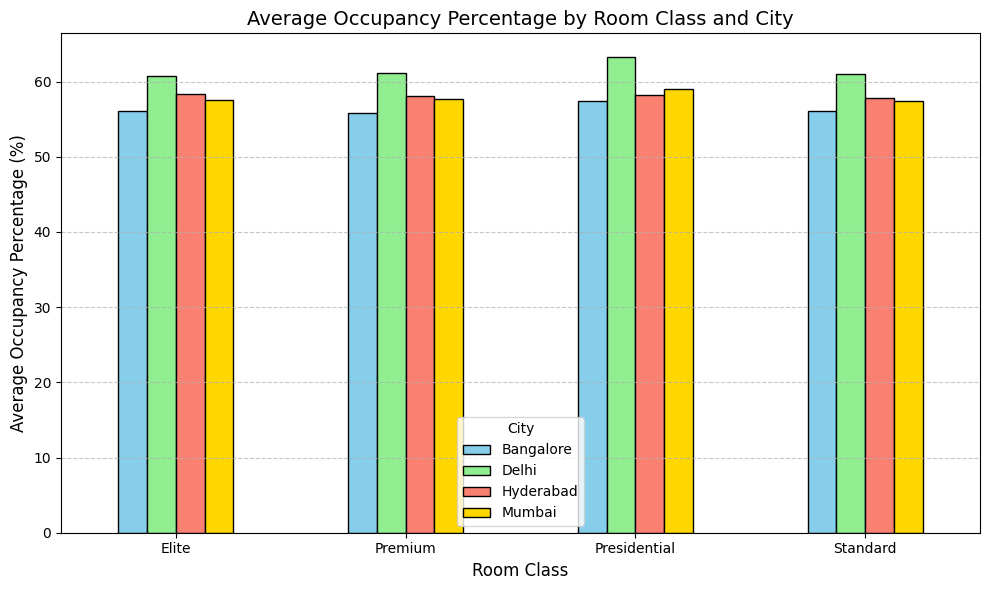

In [58]:
# Plot the bar chart
df_plot.plot(
    kind="bar",
    # stacked=True,
    color=["skyblue", "lightgreen", "salmon", "gold"],  # Colors for bars
    figsize=(10, 6),                                    # Size of the figure
    edgecolor="black"                                   # Border color
)

# Customize the chart
plt.title("Average Occupancy Percentage by Room Class and City", fontsize=14)
plt.xlabel("Room Class", fontsize=12)
plt.ylabel("Average Occupancy Percentage (%)", fontsize=12)
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title="City", fontsize=10)  # Add legend with title
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add a grid on the y-axis for readability
plt.tight_layout()

# Show the plot
plt.show()

### **4. When was the occupancy percentage better? Weekday or Weekend?**

In [59]:
df_aggregated_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-May-22,RT1,25,30,83.33
1,19562,01-May-22,RT1,28,30,93.33
2,19563,01-May-22,RT1,23,30,76.67


In [60]:
df_dates.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [61]:
df_agg_bookings_dates = pd.merge(df_aggregated_bookings, df_dates, left_on="check_in_date", right_on="date")
df_agg_bookings_dates.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,date,mmm yy,week no,day_type
0,16559,01-May-22,RT1,25,30,83.33,01-May-22,May 22,W 19,weekend
1,19562,01-May-22,RT1,28,30,93.33,01-May-22,May 22,W 19,weekend
2,19563,01-May-22,RT1,23,30,76.67,01-May-22,May 22,W 19,weekend
3,17558,01-May-22,RT1,13,19,68.42,01-May-22,May 22,W 19,weekend
4,16558,01-May-22,RT1,18,19,94.74,01-May-22,May 22,W 19,weekend


In [62]:
df_agg_bookings_dates.drop(columns = "date", inplace=True)
df_agg_bookings_dates.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,mmm yy,week no,day_type
0,16559,01-May-22,RT1,25,30,83.33,May 22,W 19,weekend
1,19562,01-May-22,RT1,28,30,93.33,May 22,W 19,weekend
2,19563,01-May-22,RT1,23,30,76.67,May 22,W 19,weekend
3,17558,01-May-22,RT1,13,19,68.42,May 22,W 19,weekend
4,16558,01-May-22,RT1,18,19,94.74,May 22,W 19,weekend


In [63]:
pd.DataFrame(df_agg_bookings_dates.groupby("day_type")["occ_pct"].mean().round(2))

,occ_pct
day_type,
weekeday,51.81
weekend,73.96


### **5. In the month of June, what is occupancy for different cities**

In [64]:
df_agg_bookings_dates["mmm yy"].unique()

<StringArray>
['May 22', 'Jun 22', 'Jul 22']
Length: 3, dtype: str

In [65]:
df_agg_room_type_city.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,01-May-22,RT1,25,30,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,01-May-22,RT1,28,30,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,01-May-22,RT1,23,30,76.67,Standard,Atliq Palace,Business,Bangalore
3,17558,01-May-22,RT1,13,19,68.42,Standard,Atliq Grands,Luxury,Mumbai
4,16558,01-May-22,RT1,18,19,94.74,Standard,Atliq Grands,Luxury,Delhi


In [66]:
df_agg_bookings_dates = pd.merge(df_agg_room_type_city, df_dates, left_on="check_in_date", right_on="date")
df_agg_bookings_dates.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,01-May-22,RT1,25,30,83.33,Standard,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
1,19562,01-May-22,RT1,28,30,93.33,Standard,Atliq Bay,Luxury,Bangalore,01-May-22,May 22,W 19,weekend
2,19563,01-May-22,RT1,23,30,76.67,Standard,Atliq Palace,Business,Bangalore,01-May-22,May 22,W 19,weekend
3,17558,01-May-22,RT1,13,19,68.42,Standard,Atliq Grands,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
4,16558,01-May-22,RT1,18,19,94.74,Standard,Atliq Grands,Luxury,Delhi,01-May-22,May 22,W 19,weekend


In [67]:
df_jun_22 = df_agg_bookings_dates[df_agg_bookings_dates["mmm yy"] == "Jun 22"]
df_jun_22.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
3100,16559,01-Jun-22,RT1,14,30,46.67,Standard,Atliq Exotica,Luxury,Mumbai,01-Jun-22,Jun 22,W 23,weekeday
3101,18560,01-Jun-22,RT1,18,30,60.00,Standard,Atliq City,Business,Hyderabad,01-Jun-22,Jun 22,W 23,weekeday
3102,19562,01-Jun-22,RT1,18,30,60.00,Standard,Atliq Bay,Luxury,Bangalore,01-Jun-22,Jun 22,W 23,weekeday
3103,19563,01-Jun-22,RT1,14,30,46.67,Standard,Atliq Palace,Business,Bangalore,01-Jun-22,Jun 22,W 23,weekeday
3104,17558,01-Jun-22,RT1,8,19,42.11,Standard,Atliq Grands,Luxury,Mumbai,01-Jun-22,Jun 22,W 23,weekeday


In [68]:
df_jun_22.groupby("city", as_index=False)["occ_pct"].mean().round(2).sort_values(by="occ_pct")

,city,occ_pct
0,Bangalore,55.85
2,Hyderabad,57.69
3,Mumbai,57.79
1,Delhi,61.46


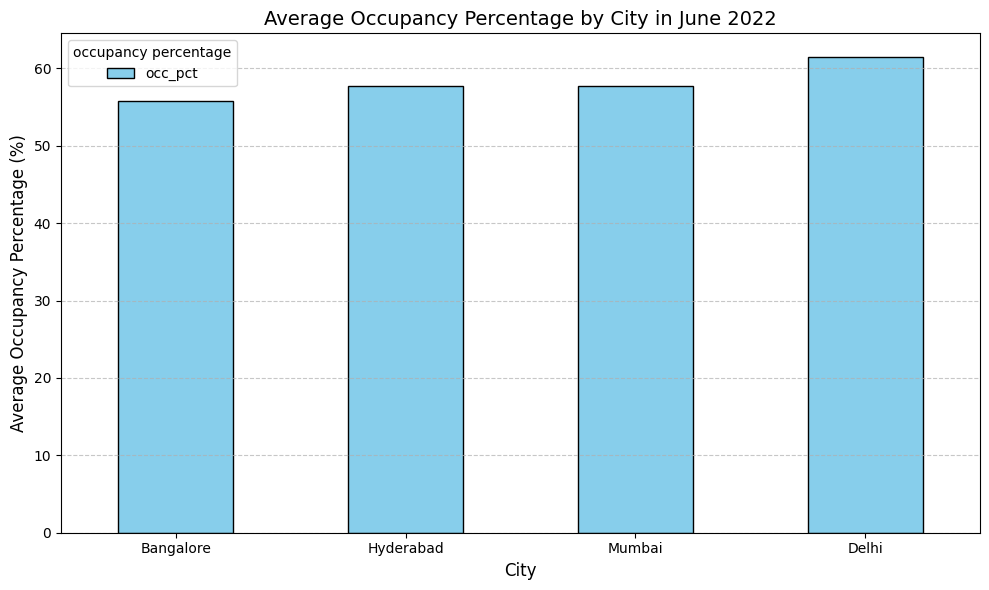

In [69]:
df_jun_22.groupby("city", as_index=False)["occ_pct"].mean().round(2).sort_values(by="occ_pct").plot(
    kind="bar",
    x="city",
    y="occ_pct",
    color="skyblue",
    figsize=(10, 6),
    edgecolor="black"  
    
)
# Customize the chart
plt.title("Average Occupancy Percentage by City in June 2022", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Average Occupancy Percentage (%)", fontsize=12)
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title="occupancy percentage", fontsize=10)  # Add legend with title
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add a grid on the y-axis for readability
plt.tight_layout()

# Show the plot
plt.show()

### **6. Display revenue realized per city.**

In [70]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [71]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [72]:
df_bookings_all = pd.merge(df_bookings, df_hotels,on="property_id")
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi


In [73]:
df_rev_by_city = df_bookings_all.groupby("city", as_index=False)["revenue_realized"].sum().sort_values(by="revenue_realized")
df_rev_by_city

,city,revenue_realized
1,Delhi,294500318
2,Hyderabad,325232870
0,Bangalore,420397050
3,Mumbai,668640991


### **7. Print month by month revenue**

In [74]:
type(df_bookings_all.check_in_date[0])

str

In [75]:
df_dates.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [76]:
df_dates["mmm yy"].unique()

<StringArray>
['May 22', 'Jun 22', 'Jul 22']
Length: 3, dtype: str

In [77]:
type(df_dates.date[0])

str

In [78]:
df_dates.date.unique()

<StringArray>
['01-May-22', '02-May-22', '03-May-22', '04-May-22', '05-May-22', '06-May-22',
 '07-May-22', '08-May-22', '09-May-22', '10-May-22', '11-May-22', '12-May-22',
 '13-May-22', '14-May-22', '15-May-22', '16-May-22', '17-May-22', '18-May-22',
 '19-May-22', '20-May-22', '21-May-22', '22-May-22', '23-May-22', '24-May-22',
 '25-May-22', '26-May-22', '27-May-22', '28-May-22', '29-May-22', '30-May-22',
 '31-May-22', '01-Jun-22', '02-Jun-22', '03-Jun-22', '04-Jun-22', '05-Jun-22',
 '06-Jun-22', '07-Jun-22', '08-Jun-22', '09-Jun-22', '10-Jun-22', '11-Jun-22',
 '12-Jun-22', '13-Jun-22', '14-Jun-22', '15-Jun-22', '16-Jun-22', '17-Jun-22',
 '18-Jun-22', '19-Jun-22', '20-Jun-22', '21-Jun-22', '22-Jun-22', '23-Jun-22',
 '24-Jun-22', '25-Jun-22', '26-Jun-22', '27-Jun-22', '28-Jun-22', '29-Jun-22',
 '30-Jun-22', '01-Jul-22', '02-Jul-22', '03-Jul-22', '04-Jul-22', '05-Jul-22',
 '06-Jul-22', '07-Jul-22', '08-Jul-22', '09-Jul-22', '10-Jul-22', '11-Jul-22',
 '12-Jul-22', '13-Jul-22', '14-Jul-22'

In [79]:
df_dates.date = pd.to_datetime(df_dates.date, format="%d-%b-%y")
df_dates.head()

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


In [80]:
type(df_dates.date[0])

pandas.Timestamp

In [81]:
df_bookings_all.check_in_date.unique()

<StringArray>
['2022-05-01', '2022-05-02', '2022-05-03', '2022-05-04', '2022-05-05',
 '2022-05-06', '2022-05-07', '2022-05-08', '2022-05-09', '2022-05-10',
 '2022-05-11', '2022-05-12', '2022-05-13', '2022-05-14', '2022-05-15',
 '2022-05-16', '2022-05-17', '2022-05-18', '2022-05-19', '2022-05-20',
 '2022-05-21', '2022-05-22', '2022-05-23', '2022-05-24', '2022-05-25',
 '2022-05-26', '2022-05-27', '2022-05-28', '2022-05-29', '2022-05-30',
 '2022-05-31', '2022-06-01', '2022-06-02', '2022-06-03', '2022-06-04',
 '2022-06-05', '2022-06-06', '2022-06-07', '2022-06-08', '2022-06-09',
 '2022-06-10', '2022-06-11', '2022-06-12', '2022-06-13', '2022-06-14',
 '2022-06-15', '2022-06-16', '2022-06-17', '2022-06-18', '2022-06-19',
 '2022-06-20', '2022-06-21', '2022-06-22', '2022-06-23', '2022-06-24',
 '2022-06-25', '2022-06-26', '2022-06-27', '2022-06-28', '2022-06-29',
 '2022-06-30', '2022-07-01', '2022-07-02', '2022-07-03', '2022-07-04',
 '2022-07-05', '2022-07-06', '2022-07-07', '2022-07-08', '2022-

In [82]:
df_bookings_all.check_in_date = pd.to_datetime(df_bookings_all.check_in_date, format="%Y-%m-%d")
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi


In [84]:
type(df_bookings_all.check_in_date[0])

pandas.Timestamp

In [85]:
df_bookings_all = pd.merge(df_bookings_all, df_dates, left_on="check_in_date", right_on="date")
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


In [86]:
df_bookings_all.drop(columns="date", inplace=True)
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,mmm yy,week no,day_type
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,May 22,W 19,weekend
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,May 22,W 19,weekend
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,May 22,W 19,weekend
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,May 22,W 19,weekend
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,May 22,W 19,weekend


In [87]:
df_bookings_all.groupby("mmm yy", as_index=False)["revenue_realized"].sum().sort_values(by="revenue_realized")

,mmm yy,revenue_realized
1,Jun 22,553932355
0,Jul 22,572908208
2,May 22,581930666


### **8. Display a pie chart of revenue realized per booking platform**

In [88]:
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,mmm yy,week no,day_type
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,May 22,W 19,weekend
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,May 22,W 19,weekend
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,May 22,W 19,weekend
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,May 22,W 19,weekend
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,May 22,W 19,weekend


In [89]:
df = df_bookings_all.groupby("booking_platform", as_index=False)["revenue_realized"].sum()
df

,booking_platform,revenue_realized
0,direct offline,86404333
1,direct online,169026467
2,journey,102531334
3,logtrip,187554488
4,makeyourtrip,340834504
5,others,699353302
6,tripster,123066801


In [90]:
# Convert revenue to billions
revenues_mn = df["revenue_realized"] / 1e6
revenues_mn



0     86.404333
1    169.026467
2    102.531334
3    187.554488
4    340.834504
5    699.353302
6    123.066801
Name: revenue_realized, dtype: float64

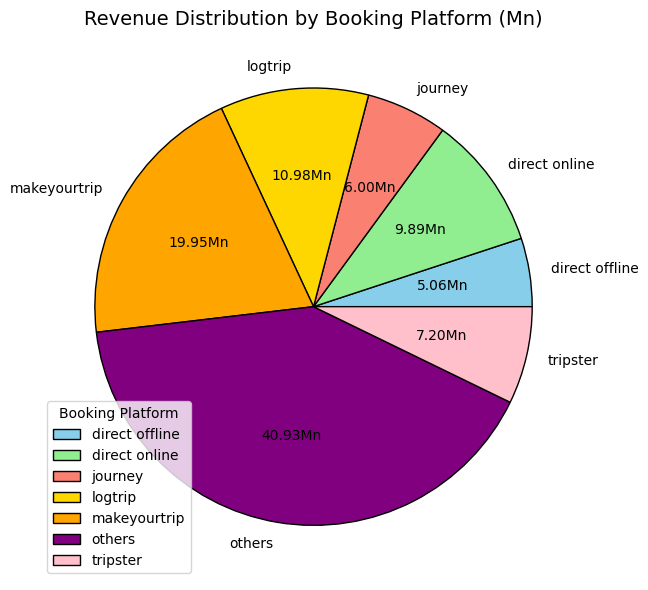

In [91]:
# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(
    revenues_mn, 
    labels=df["booking_platform"], 
    autopct='%1.2fMn', 
    startangle=0, 
    colors=["skyblue", "lightgreen", "salmon", "gold", "orange", "purple", "pink"],
    wedgeprops={"edgecolor": "black"}  # Border color
)

# Customize the chart
plt.title("Revenue Distribution by Booking Platform (Mn)", fontsize=14)
plt.legend(title="Booking Platform", fontsize=10, loc="best")  # Add legend with title
plt.tight_layout()

# Show the plot
plt.show()


In [92]:
# revenue pie by booking platform
df = df_bookings_all.groupby("booking_platform")["revenue_realized"].sum()
df

booking_platform
direct offline     86404333
direct online     169026467
journey           102531334
logtrip           187554488
makeyourtrip      340834504
others            699353302
tripster          123066801
Name: revenue_realized, dtype: int64

In [93]:
labels = []
# Format labels to show revenue in millions
labels = []
for book_plat, rev in df.items():
    labels.append(f"{book_plat}: {rev / 1_000_000:.1f}MN")

# Print formatted labels
print(labels)

['direct offline: 86.4MN', 'direct online: 169.0MN', 'journey: 102.5MN', 'logtrip: 187.6MN', 'makeyourtrip: 340.8MN', 'others: 699.4MN', 'tripster: 123.1MN']


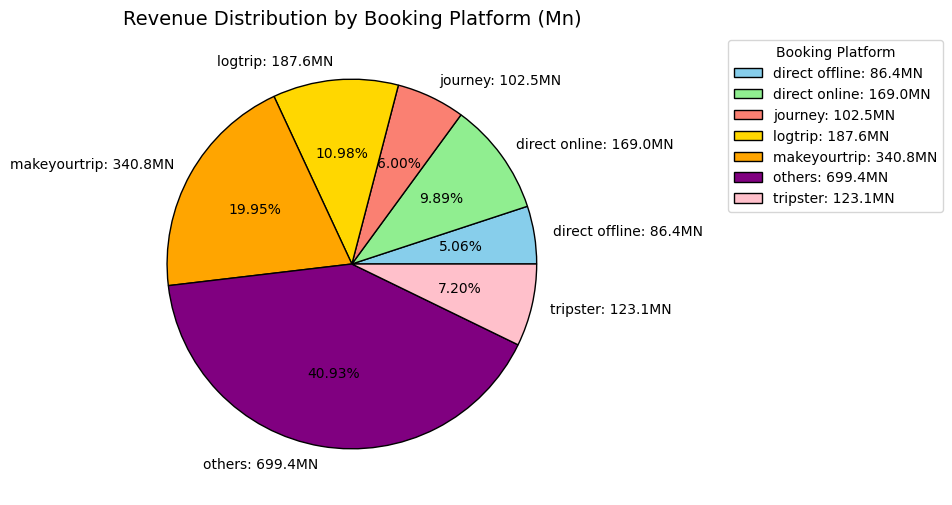

In [94]:
# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(
    revenues_mn, 
    labels=labels, 
    autopct='%1.2f%%', 
    startangle=0, 
    colors=["skyblue", "lightgreen", "salmon", "gold", "orange", "purple", "pink"],
    wedgeprops={"edgecolor": "black"}  # Border color
)
# Customize the chart
plt.title("Revenue Distribution by Booking Platform (Mn)", fontsize=14)
plt.legend(title="Booking Platform", fontsize=10, loc="upper left", bbox_to_anchor=(1.3, 1))  # Add legend with title
# plt.tight_layout()

# Show the plot
plt.show()

### 9. Display revenue realized per hotel type

### 10. Display average rating per city

### 11. Display a line chart of occupancy % by weeks

### 12. Display a line chart of average ratings by weeks 

### 13. Display a pie chart of revenue realized per room type 

### 14. Display a horizontal bar chart of revenue realized per city